In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
#% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras import regularizers
from keras.callbacks import LearningRateScheduler, ModelCheckpoint, ReduceLROnPlateau
from keras_contrib.callbacks import CyclicLR

Using TensorFlow backend.


In [2]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

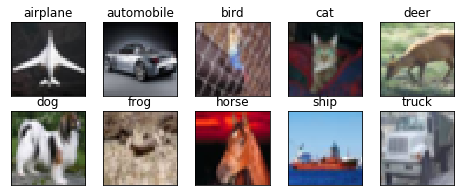

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [4]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [5]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [6]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/home/intern001/anaconda3/envs/tensor_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/home/intern001/anaconda3/envs/tensor_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  """
/home/intern001/anaconda3/envs/tensor_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  if __name__ == '__main__':
/home/intern001/anaconda3/envs/tensor_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # This is added back by InteractiveShellApp.init_path()
/home/intern001/anaconda3/envs/tensor_gpu/lib/python3.6/site-pack

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

/home/intern001/anaconda3/envs/tensor_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/home/intern001/anaconda3/envs/tensor_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 7s 19ms/step - loss: 1.8112 - acc: 0.3123 - val_loss: 1.4143 - val_acc: 0.4825
Epoch 2/50
390/390 [==============================] - 6s 15ms/step - loss: 1.3124 - acc: 0.5230 - val_loss: 1.1492 - val_acc: 0.5878
Epoch 3/50
390/390 [==============================] - 6s 15ms/step - loss: 1.1016 - acc: 0.6105 - val_loss: 0.9920 - val_acc: 0.6505
Epoch 4/50
390/390 [==============================] - 6s 15ms/step - loss: 0.9619 - acc: 0.6657 - val_loss: 0.8566 - val_acc: 0.7074
Epoch 5/50
390/390 [==============================] - 6s 15ms/step - loss: 0.8612 - acc: 0.7037 - val_loss: 0.7901 - val_acc: 0.7327
Epoch 6/50
390/390 [==============================] - 6s 15ms/step - loss: 0.7837 - acc: 0.7309 - val_loss: 0.7230 - val_acc: 0.7567
Epoch 7/50
390/390 [==============================] - 6s 15ms/step - loss: 0.7403 - acc: 0.7479 - val_loss: 0.6957 - val_acc: 0.7624
Epoch 8/50
390/390 [==============================] - 6s 15ms/step - 

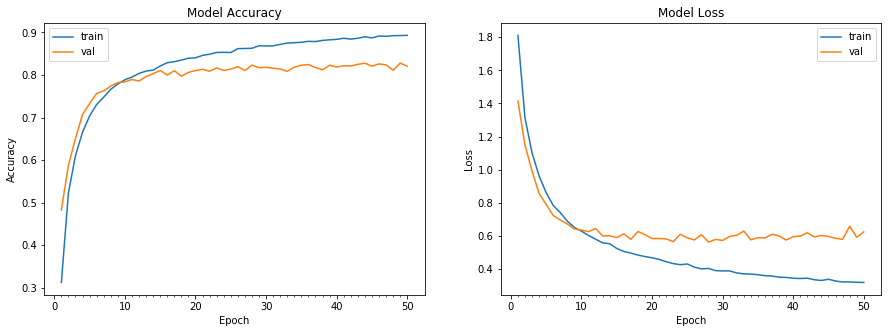

Accuracy on test data is: 82.05


In [9]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [10]:
model.evaluate(test_features, test_labels)

10000/10000 [==============================] - 1s 74us/step


[0.6245143092155456, 0.8205]

In [11]:
# MY Model
my_model = Sequential()
my_model.add(SeparableConv2D(48, (3, 3), use_bias=False, input_shape=(32, 32, 3), kernel_regularizer=regularizers.l2(0.0001))) #S-30, R-3
my_model.add(BatchNormalization())
my_model.add(Activation('relu'))
my_model.add(Dropout(0.1))

my_model.add(SeparableConv2D(48, (3, 3), use_bias=False, kernel_regularizer=regularizers.l2(0.0001))) #S-28, R-5
my_model.add(BatchNormalization())
my_model.add(Activation('relu'))
my_model.add(Dropout(0.1))

my_model.add(SeparableConv2D(48, (3, 3), use_bias=False, kernel_regularizer=regularizers.l2(0.0001))) #S-26, R-7
my_model.add(BatchNormalization())
my_model.add(Activation('relu'))
my_model.add(MaxPooling2D(pool_size=(2, 2))) #S-13, R-8
my_model.add(Dropout(0.1))

my_model.add(SeparableConv2D(96, (3, 3), use_bias=False, kernel_regularizer=regularizers.l2(0.0001))) #S-11, R-12
my_model.add(BatchNormalization())
my_model.add(Activation('relu'))
my_model.add(Dropout(0.1))

my_model.add(SeparableConv2D(96, (3, 3), use_bias=False, kernel_regularizer=regularizers.l2(0.0001))) #S-9, R-16
my_model.add(BatchNormalization())
my_model.add(Activation('relu'))
my_model.add(Dropout(0.1))

my_model.add(SeparableConv2D(96, (3, 3), use_bias=False, kernel_regularizer=regularizers.l2(0.0001))) #S-7, R-20
my_model.add(BatchNormalization())
my_model.add(Activation('relu'))
my_model.add(Dropout(0.1))

my_model.add(SeparableConv2D(192, (3, 3), use_bias=False, kernel_regularizer=regularizers.l2(0.0001))) #S-5, R-24
my_model.add(BatchNormalization())
my_model.add(Activation('relu'))
my_model.add(Dropout(0.1))

my_model.add(SeparableConv2D(192, (3, 3), use_bias=False, kernel_regularizer=regularizers.l2(0.0001))) #S-3, R-28
my_model.add(BatchNormalization())
my_model.add(Activation('relu'))
my_model.add(Dropout(0.1))

my_model.add(SeparableConv2D(num_classes, (1,1), kernel_regularizer=regularizers.l2(0.0001))) #S-3, R-28
my_model.add(GlobalAveragePooling2D())
my_model.add(Activation('softmax'))

my_model.compile(optimizer=Adam(lr=0.003), loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
my_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 30, 30, 48)        171       
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 48)        192       
_________________________________________________________________
activation_9 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 30, 30, 48)        0         
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 28, 28, 48)        2736      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 48)        192       
_________________________________________________________________
activation_10 (Activation)   (None, 28, 28, 48)        0         
__________

/home/intern001/anaconda3/envs/tensor_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/intern001/anaconda3/envs/tensor_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:51: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., steps_per_epoch=390, validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., epochs=50)`


Epoch 1/50
390/390 [==============================] - 18s 46ms/step - loss: 1.5426 - acc: 0.4339 - val_loss: 1.7436 - val_acc: 0.4707
Epoch 2/50
390/390 [==============================] - 16s 42ms/step - loss: 1.1997 - acc: 0.5681 - val_loss: 1.7805 - val_acc: 0.5120
Epoch 3/50
390/390 [==============================] - 16s 42ms/step - loss: 1.0745 - acc: 0.6176 - val_loss: 1.1780 - val_acc: 0.6217
Epoch 4/50
390/390 [==============================] - 16s 42ms/step - loss: 0.9910 - acc: 0.6502 - val_loss: 1.1953 - val_acc: 0.6275
Epoch 5/50
390/390 [==============================] - 17s 42ms/step - loss: 0.9354 - acc: 0.6679 - val_loss: 1.0795 - val_acc: 0.6492
Epoch 6/50
390/390 [==============================] - 16s 42ms/step - loss: 0.8943 - acc: 0.6838 - val_loss: 0.8922 - val_acc: 0.7004
Epoch 7/50
390/390 [==============================] - 17s 43ms/step - loss: 0.8580 - acc: 0.6977 - val_loss: 0.8271 - val_acc: 0.7163
Epoch 8/50
390/390 [==============================] - 16s 42ms

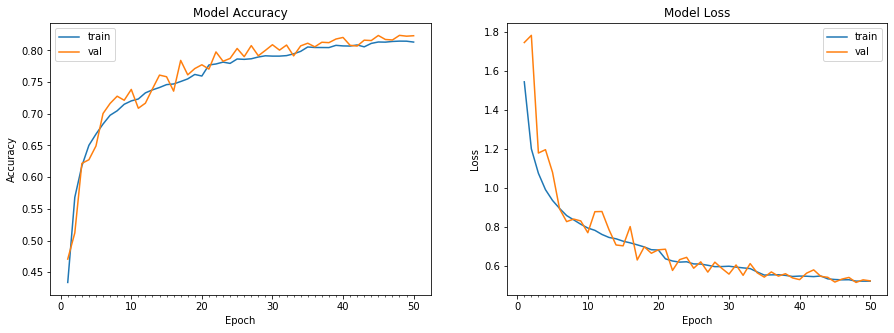

Accuracy on test data is: 82.31


In [13]:
# Tried CyclicLR & Augmentations from imgaug library, but unfortunately they didn't work here for this experiment. But very useful to know 
# & willbe useful in other experiments. 
'''
from keras_contrib.callbacks import CyclicLR

# We do cycles between max_lr and base_lr where the cycle repeats every step_size*2 batches
# mode='traingular2' ensures that the max_lr decays slowly as the epochs increase, in later epochs this helps the network stabilise

clr = CyclicLR(base_lr=0.0001,max_lr=0.02,step_size=500, mode='triangular2')

from imgaug import augmenters as iaa

def process_imgs(btchs):
  seq = iaa.Sequential([
      iaa.Sometimes(0.5, iaa.GaussianBlur(sigma=(0, 0.5))),
      iaa.ContrastNormalization((0.75, 1.5)),
      iaa.CoarsePepper(p=0.05, size_percent=(0.01, 0.1))])
      
  while True:
                   
    batch_x, batch_y = next(btchs)
    batch_augmented = np.zeros((batch_x.shape[0], batch_x.shape[1], batch_x.shape[2], 3)) 
    # NOTE: imgaug works on color images (3 channels). doesn't work on greyscale images with one channel
    batch_augmented = seq.augment_images(batch_x) # calling ImgAug's augmentation on a batch of images
    yield (batch_augmented, batch_y)


def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)
# callbacks=[LearningRateScheduler(scheduler, verbose=1)]

'''

datagen = ImageDataGenerator(
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)

#datagen.fit(train_features)

datagen2 = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

checkpoint = ModelCheckpoint("model.hdf5", monitor='val_acc', verbose=0, save_best_only=True, mode='max')

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.5, patience=3, min_lr=0.0001,verbose=0)
callbacks_list = [checkpoint,reduce_lr]


train_gen = datagen.flow(train_features, train_labels, batch_size = 128)
#train_process = process_imgs(train_gen)
valid_gen = datagen2.flow(test_features, test_labels, batch_size = 128)
# train the model
start = time.time()
# Train the model
my_model_info = my_model.fit_generator(train_gen,
                                 steps_per_epoch=train_features.shape[0] // 128, nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1, callbacks=callbacks_list)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(my_model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, my_model))